<a href="https://colab.research.google.com/github/graci-py/Data_Science/blob/main/notebook/Explora%C3%A7%C3%A3o_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importando as bibliotecas
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import xgboost
import collections
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, auc
from sklearn.metrics import f1_score
pd.set_option('display.max_columns', None)

In [3]:
# leitura do df nrows =5
url = 'https://raw.githubusercontent.com/allanbraquiel/Stack_Labs_2_Squad_Scikit-Learn/main/datasets/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
df = pd.read_csv(url)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
df.shape

(70692, 22)

In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [6]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [7]:
df.Diabetes_binary.value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [10]:
df.Diabetes_binary.value_counts(normalize = True)

0.0    0.5
1.0    0.5
Name: Diabetes_binary, dtype: float64

In [11]:
dados = df.rename(columns = {'Diabetes_binary':'Diabetes', 
                                         'HighBP':'PressAlta',  
                                         'HighChol':'CholAlto',
                                         'CholCheck':'ColCheck', 
                                         'BMI':'IMC', 
                                         'Smoker':'Fumante', 
                                         'Stroke':'Derrame',
                                         'HeartDiseaseorAttack':'CoracaoEnf', 
                                         'PhysActivity':'AtivFisica', 
                                         'Fruits':'Frutas',
                                         'Veggies':"Vegetais", 
                                         'HvyAlcoholConsump':'ConsAlcool', 
                                         'AnyHealthcare':'PlSaude',
                                         'NoDocbcCost':'DespMedica', 
                                         'GenHlth':'SdGeral',
                                         'MentHlth':'SdMental',
                                         'PhysHlth':'SdFisica',
                                         'DiffWalk':'DifCaminhar', 
                                         'Sex':'Sexo',
                                         'Age':'Idade',
                                         'Education':'Educacao',
                                         'Income':'Renda' })

In [12]:
dados.head()

,Diabetes,PressAlta,CholAlto,ColCheck,IMC,Fumante,Derrame,CoracaoEnf,AtivFisica,Frutas,Vegetais,ConsAlcool,PlSaude,DespMedica,SdGeral,SdMental,SdFisica,DifCaminhar,Sexo,Idade,Educacao,Renda
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


#Realizando a divisão dos Dados

In [13]:
# Separando a variável resposta
X = dados.drop(['Diabetes'], axis=1)
y = dados['Diabetes']

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PressAlta    70692 non-null  float64
 1   CholAlto     70692 non-null  float64
 2   ColCheck     70692 non-null  float64
 3   IMC          70692 non-null  float64
 4   Fumante      70692 non-null  float64
 5   Derrame      70692 non-null  float64
 6   CoracaoEnf   70692 non-null  float64
 7   AtivFisica   70692 non-null  float64
 8   Frutas       70692 non-null  float64
 9   Vegetais     70692 non-null  float64
 10  ConsAlcool   70692 non-null  float64
 11  PlSaude      70692 non-null  float64
 12  DespMedica   70692 non-null  float64
 13  SdGeral      70692 non-null  float64
 14  SdMental     70692 non-null  float64
 15  SdFisica     70692 non-null  float64
 16  DifCaminhar  70692 non-null  float64
 17  Sexo         70692 non-null  float64
 18  Idade        70692 non-null  float64
 19  Educ

In [17]:
# dividir o dataset entre treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Regressão Logística

In [18]:
# Criando o modelo
classifier = LogisticRegression(max_iter= 5000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

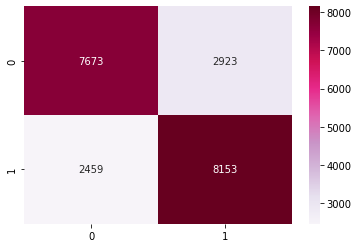

Acurácia:  74.622783855149
                    precision    recall  f1-score   support

    Tem Diabete(1)       0.76      0.72      0.74     10596
Não Tem Diabete(0)       0.74      0.77      0.75     10612

          accuracy                           0.75     21208
         macro avg       0.75      0.75      0.75     21208
      weighted avg       0.75      0.75      0.75     21208



In [20]:
# Exibindo os resultados da classificação
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="PuRd")
plt.show()
from sklearn.metrics import classification_report
ac = accuracy_score(y_test,y_pred)*100
print('Acurácia: ',ac)
print(classification_report(y_test,y_pred, 
                            target_names = ['Tem Diabete(1)','Não Tem Diabete(0)']))

#Random Forest

In [21]:
# Definindo parâmetros para o modelo
params = {'max_leaf_nodes': [2,4,8,16,32,64,128], 'min_samples_split':[2,3,4]}
grid_search_cv = GridSearchCV(RandomForestClassifier(n_estimators=500, random_state=42), params, verbose=1, cv=3, scoring='roc_auc')
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=500,
                                              random_state=42),
             param_grid={'max_leaf_nodes': [2, 4, 8, 16, 32, 64, 128],
                         'min_samples_split': [2, 3, 4]},
             scoring='roc_auc', verbose=1)

In [22]:
# Criação do modelo
clf = RandomForestClassifier(random_state=42, n_estimators=500,**grid_search_cv.best_params_)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

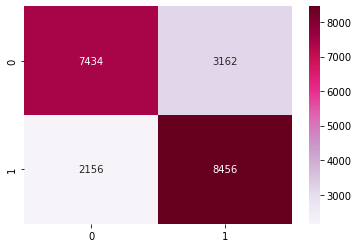

Acurácia:  74.9245567710298
                     precision    recall  f1-score   support

     Tem Diabete(1)       0.78      0.70      0.74     10596
Não tem diabete (0)       0.73      0.80      0.76     10612

           accuracy                           0.75     21208
          macro avg       0.75      0.75      0.75     21208
       weighted avg       0.75      0.75      0.75     21208



In [23]:
# Exibindo os resultados da classificação
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="PuRd")
plt.show()
from sklearn.metrics import classification_report
ac = accuracy_score(y_test,y_pred)*100
print('Acurácia: ',ac)
print(classification_report(y_test,y_pred, 
                            target_names = ['Tem Diabete(1)','Não tem diabete (0)']))

#KNN

In [ ]:
# Criando o modelo
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)
    scores = cross_val_score(neigh, X_test, y_test, scoring='accuracy', cv=cv)
    print('k=%d : %.3f' % (i, (np.mean(scores))))
y_pred = cross_val_predict(neigh, X_test, y_test, cv=10)

k=1 : 0.648
k=2 : 0.630
k=3 : 0.681
k=4 : 0.672
k=5 : 0.695
k=6 : 0.688
k=7 : 0.702
k=8 : 0.699
k=9 : 0.708
k=10 : 0.705
k=11 : 0.712


In [ ]:
# Exibindo os resultados da classificação
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="PuRd")
plt.show()
ac = accuracy_score(y_test,y_pred)*100
print('Acurácia: ',ac)
print(classification_report(y_test,y_pred, 
                            target_names = ['Tem Diabete(1)','Não Tem diabete (0)']))

#XG BOOST

In [ ]:
# Criação do modelo
xgb = xgboost.XGBClassifier(earning_rate=0.009, n_estimators=350, subsample=0.8, max_depth=7)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [ ]:
# Exibindo os resultados da classificação
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="PuRd")
plt.show()
from sklearn.metrics import classification_report
ac = accuracy_score(y_test,y_pred)*100
print('Acurácia: ',ac)
print(classification_report(y_test,y_pred, 
                            target_names = ['Tem Diabete(1)','Não Tem diabete (0)']))